## Exercise 3-1

In [2]:
# Loading libraries
import numpy as np
import nsfg
import thinkstats2
import first
import thinkplot

#Downloading data
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

'''Okay, this was a pain. I KEPT looking for the right variable of 
nmkdhh (lowercase btw) and it was in the response dct not the preg dct.'''
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [3]:
# Loading data frames
resp = nsfg.ReadFemResp()
preg = nsfg.ReadFemPreg()

/Users/rowe/DSC530-T302 Data Exploration and Analysis/nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
/Users/rowe/DSC530-T302 Data Exploration and Analysis/nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

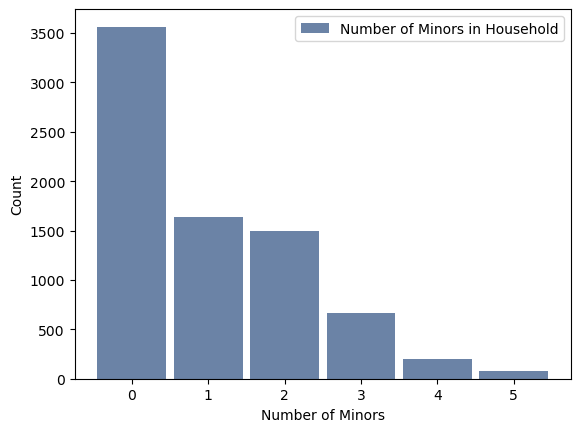

In [4]:
# Histogram of preg.numkdhh
hist = thinkstats2.Hist(resp.numkdhh, label="Number of Minors in Household")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Number of Minors", ylabel="Count")

In [5]:
# Looking for numkdhh before I realized you could open the dct file with a text editor.

# Import Libraries
import pandas as pd
from IPython.display import display, HTML

# Define the data frame you are analyzing
columns = resp.columns
scrollable_html = "<div style='max-height: 300px; overflow-y: scroll;'>" + "<br>".join(columns) + "</div>"

# Display the scrollable list
display(HTML(scrollable_html))

In [6]:
# Defining probability mass function of minors in a household
pmf = thinkstats2.Pmf(resp.numkdhh, label="actual")

In [7]:
# Function for calculating observation bias
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

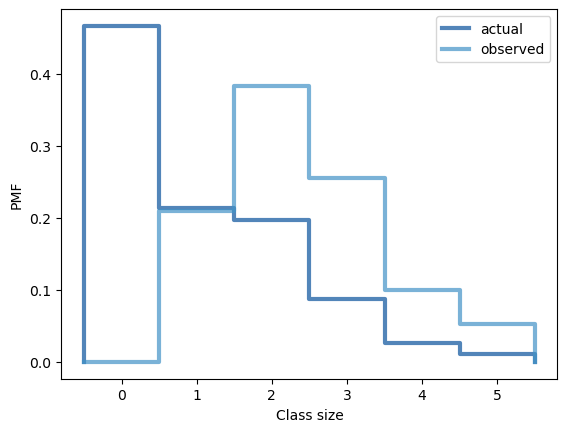

In [8]:
# Ploting histogram of both actual and observed minors in household
biased_pmf = BiasPmf(pmf, label="observed")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Class size", ylabel="PMF")

In [9]:
# Calculating means of actual and observed
print("Actual mean: {:.4f}".format(pmf.Mean()))
print("Observed mean: {:.4f}".format(biased_pmf.Mean()))

Actual mean: 1.0242
Observed mean: 2.4037


In [10]:
'''I've read the book and watched videos.
I don't understand why this bias works this way.
I understand bias in data, but this calculation doesn't make sense to me.
Can you recommend further reading or viewing?
Otherwise, I will have to accept it as a convention.'''

"I've read the book and watched videos.\nI don't understand why this bias works this way.\nI understand bias in data, but this calculation doesn't make sense to me.\nCan you recommend further reading or viewing?\nOtherwise, I will have to accept it as a convention."

## Exercise 3-2

In [12]:
'''Lifted from the solution,
defining a function to calculate the mean of a PMF'''
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

In [13]:
'''Also lifted from the solution,
defining a function to calculate the variance of a PMF'''
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [14]:
# Defining variables for comparison
pmf_calc_mean = PmfMean(pmf)
pmf_calc_var = PmfVar(pmf)

# Comparing PmfMean and Calculated Mean
print(f"Calculated Mean: {pmf_calc_mean:.4f}")
print(f"Pmf Mean: {pmf.Mean():.4f}")
print("\n")
print(f"Calculated Var: {pmf_calc_var:.4f}")
print(f"Pmf Var: {pmf.Var():.4f}")

Calculated Mean: 1.0242
Pmf Mean: 1.0242


Calculated Var: 1.4129
Pmf Var: 1.4129


## Exercise 4-1

In [16]:
# I was the fourth child and I weighed nine pounds even. My poor mother.

In [17]:
# Lifted this from the book and modified it for this exercise.
def PercentileRank(scores, my_wgt):
    count = 0
    for score in scores:# Interesting loop here.
        if score <= my_wgt:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank


In [18]:
# Defining my weight
my_wgt = 9

# Defining variable for birth weights sans null values
birth_weights = list(preg.totalwgt_lb.dropna())

# Calculating percentile
percentile_rank = PercentileRank(birth_weights, my_wgt)

# Print the result
print(f"Percentile of my birth weight is {percentile_rank:.1f}%")


Percentile of my birth weight is 92.5%


## Exercise 4-2

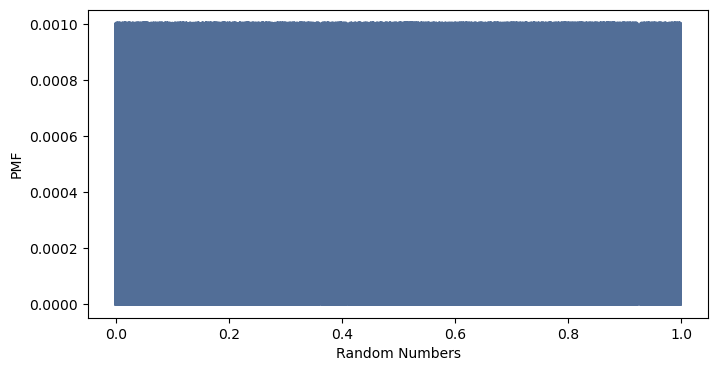

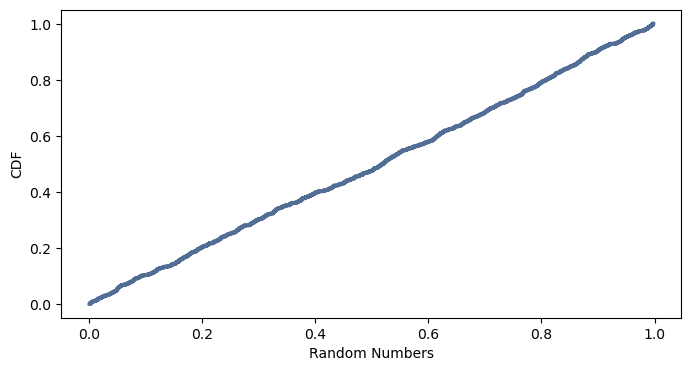

'I tried this with several values from 10 to 10MM.\nThe higher you go, the more even the even the distribution is.\nAt 10MM, the CDF was a straight diagonal line. Neat stuff!'

In [40]:
import random
import matplotlib.pyplot as plt

# Generating 1,000 random numbers.
random_numbers = [random.random() for _ in range(1000)]

# Generating a PMF
pmf = thinkstats2.Pmf(random_numbers)

# Generating a CFG
cdf = thinkstats2.Cdf(random_numbers)

# Plotting PMF
plt.figure(figsize=(8, 4))
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Random Numbers', ylabel='PMF')
plt.show()

# Step 5: Plot the CDF
plt.figure(figsize=(8, 4))
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random Numbers', ylabel='CDF')
plt.show()

'''I tried this with several values from 10 to 10MM.
The higher you go, the more even the even the distribution is.
At 10MM, the CDF was a straight diagonal line. Neat stuff!'''